In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.interpolate as intp

## Grain Size Data

In [2]:
data = np.loadtxt(
    '../data/Buettner-et-al_2006_JGR_grainsizes.txt',
    skiprows=2, delimiter=','
)

In [3]:
data

array([[6.25000000e-02, 1.10400000e+00, 1.80700000e+00],
       [8.83883500e-02, 2.91000000e+00, 4.51000000e+00],
       [1.25000000e-01, 4.81500000e+00, 7.22300000e+00],
       [1.76776700e-01, 9.51200000e+00, 1.29900000e+01],
       [2.50000000e-01, 1.58700000e+01, 1.96900000e+01],
       [3.53553390e-01, 2.36900000e+01, 2.76400000e+01],
       [5.00000000e-01, 3.39900000e+01, 3.97700000e+01],
       [7.07106780e-01, 4.74900000e+01, 5.13400000e+01],
       [1.00000000e+00, 6.25800000e+01, 6.25800000e+01],
       [1.41421356e+00, 7.98000000e+01, 7.95700000e+01],
       [2.00000000e+00, 1.00000000e+02, 1.00000000e+02]])

In [4]:
xsieve, ams, ast = 1e-3 * data[:, 0], data[:, 1], data[:, 2]

In [5]:
x = np.sqrt(xsieve[1:] * xsieve[:-1])
x

array([7.43254457e-05, 1.05112053e-04, 1.48650891e-04, 2.10224107e-04,
       2.97301779e-04, 4.20448207e-04, 5.94603557e-04, 8.40896415e-04,
       1.18920711e-03, 1.68179283e-03])

In [6]:
diff_m_ams = (ams[1:] - ams[:-1]) / 100
diff_m_ams

array([0.01806, 0.01905, 0.04697, 0.06358, 0.0782 , 0.103  , 0.135  ,
       0.1509 , 0.1722 , 0.202  ])

In [7]:
mu_ams = diff_m_ams / (xsieve[1:] - xsieve[:-1])
mu_ams

array([697.61108761, 520.32618033, 907.16480579, 868.30284896,
       755.16600664, 703.327991  , 651.83766558, 515.20482447,
       415.72757782, 344.8355684 ])

In [8]:
diff_m_ast = (ast[1:] - ast[:-1]) / 100
mu_ast = diff_m_ast / (xsieve[1:] - xsieve[:-1])
mu_ast

array([1044.09898661,  741.02095918, 1113.82146796,  915.00929349,
        767.71991723,  828.28820688,  558.64902153,  383.75760286,
        410.1748866 ,  348.76191398])

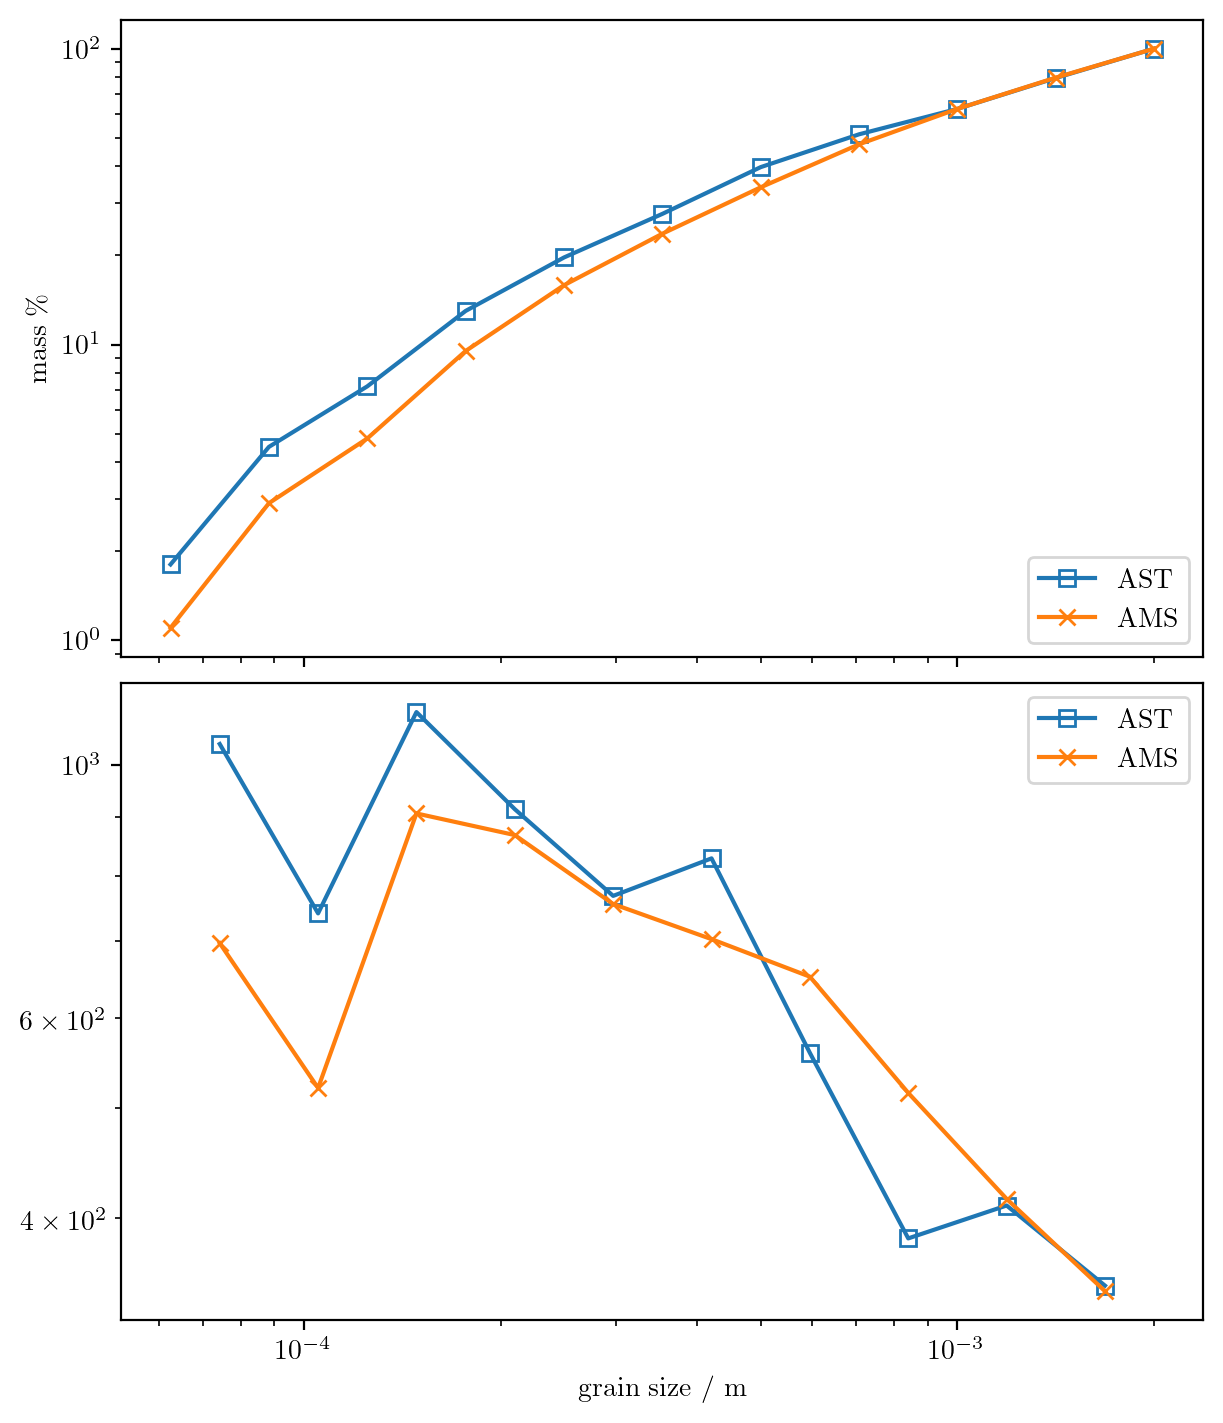

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, constrained_layout=True)

ax1.plot(xsieve, ast, marker='s', mfc='none', label=r'AST')
ax1.plot(xsieve, ams, marker='x', label='AMS')
ax1.set(
    yscale='log', ylabel=r'mass \%'
)
ax1.legend(loc='lower right')

ax2.plot(x, mu_ast, marker='s', mfc='none', label='AST')
ax2.plot(x, mu_ams, marker='x', label='AMS')
ax2.set(
    xscale='log', yscale='log',
    xlabel=r'grain size / m'
)
ax2.legend(loc='upper right')
fig.set_size_inches(6, 7)

In [10]:
def weibull(x, lmda, q):
    y = x / lmda
    return (q / lmda) * y ** (q - 1) * np.exp(-(y ** q))


def weibull_cumul(x, lmda, q):
    return 1. - np.exp(-((x / lmda) ** q))

In [11]:
res_ast = curve_fit(weibull, x, mu_ast, p0=[5e-4, 1.2])
res_ast

(array([8.77730281e-04, 1.06113116e+00]),
 array([[ 6.74525409e-09, -4.97618387e-06],
        [-4.97618387e-06,  8.96933859e-03]]))

In [12]:
res_ams = curve_fit(weibull, x, mu_ams, p0=[5e-4, 1.2])
res_ams

(array([9.62075450e-04, 1.23934843e+00]),
 array([[ 5.43216975e-09, -4.19142994e-06],
        [-4.19142994e-06,  7.26278817e-03]]))

In [13]:
res_4 = curve_fit(
    lambda x, lmda: weibull(x, lmda, 4), x, mu_ams, p0=[5e-4,])
res_4

(array([0.00102401]), array([[1.7716741e-08]]))

In [14]:
lmda0 = 1.25e-4 / .75 ** .25
lmda0

0.00013432124147794275

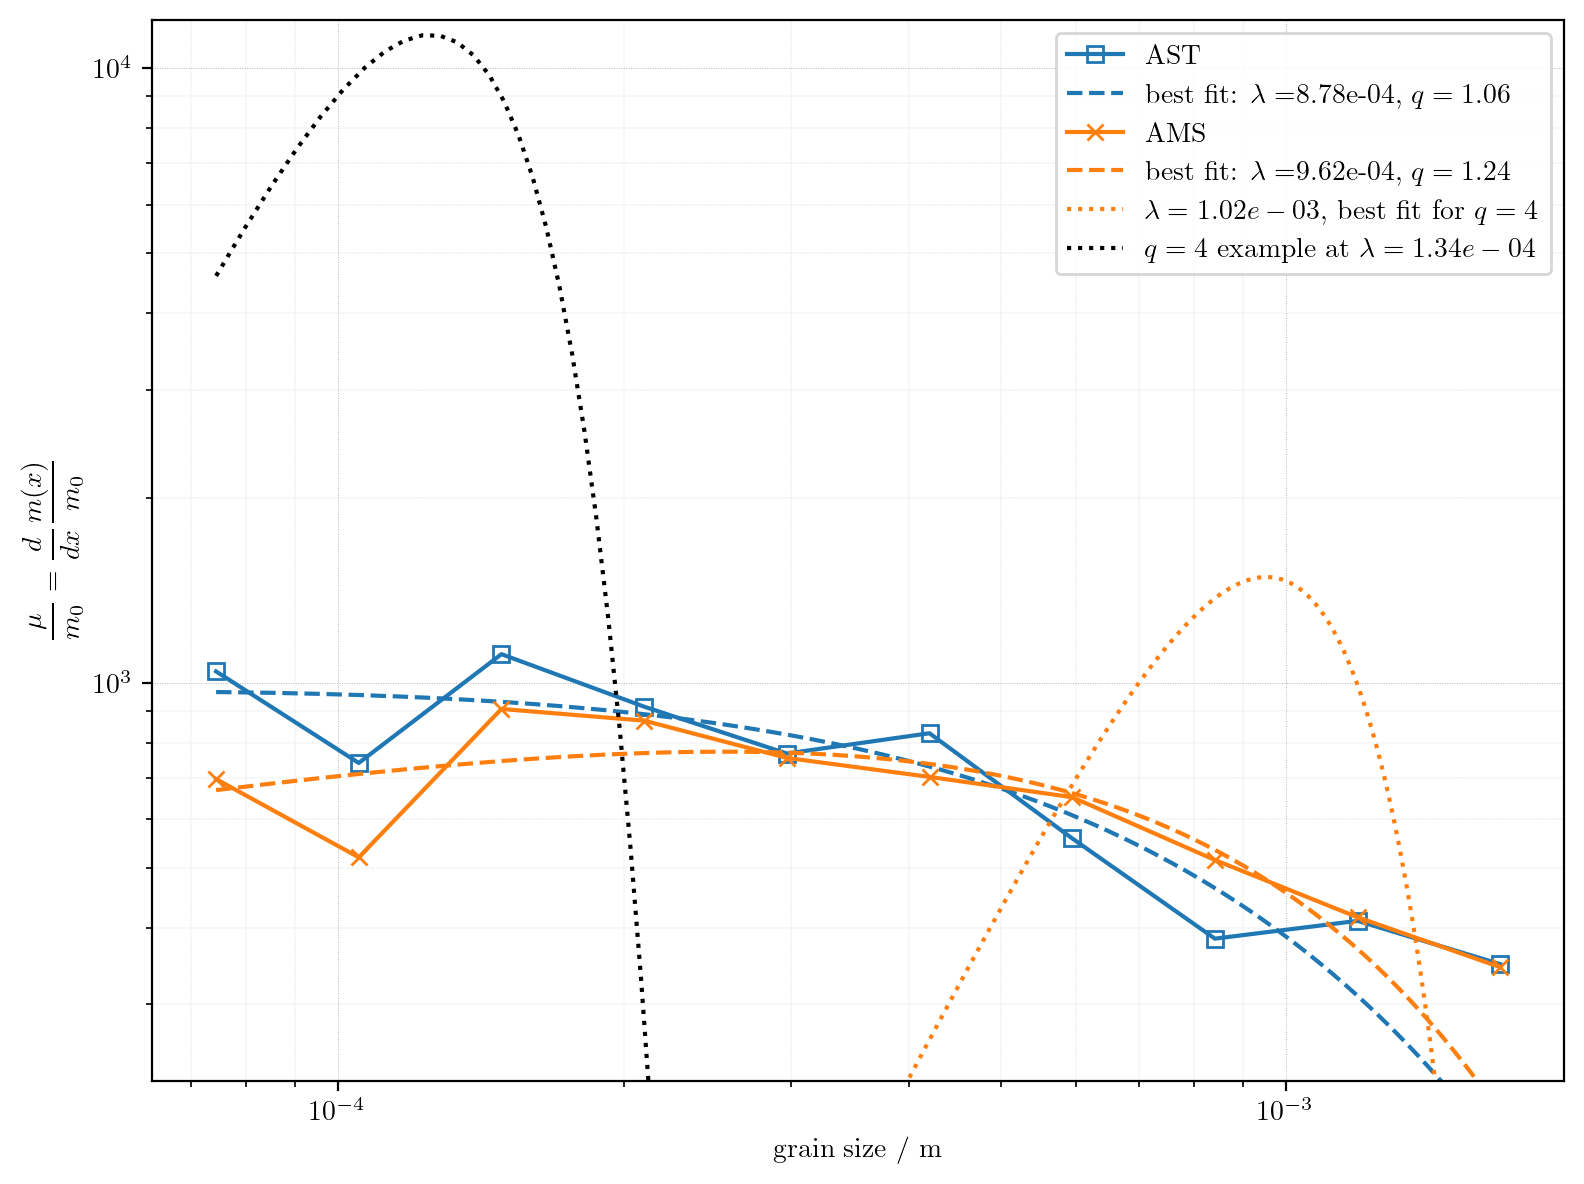

In [15]:
fig, ax = plt.subplots()

xp = np.linspace(x[0], x[-1], 300)

l, = ax.plot(x, mu_ast, marker='s', mfc='none', label='AST')
ax.plot(
    xp, weibull(xp, *res_ast[0]), ls='dashed', color=l.get_color(),
    label=fr'best fit: $\lambda=${res_ast[0][0]:.2e}, $q={res_ast[0][1]:.2f}$'
)
l, = ax.plot(x, mu_ams, marker='x', label='AMS')
ax.plot(
    xp, weibull(xp, *res_ams[0]), ls='dashed', color=l.get_color(),
    label=fr'best fit: $\lambda=${res_ams[0][0]:.2e}, $q={res_ams[0][1]:.2f}$'
)
ax.plot(
    xp, weibull(xp, res_4[0][0], 4), ls='dotted', color=l.get_color(),
    label=r'${\lambda=%.2e}$, best fit for $q=4$' % res_4[0][0]
)
ax.plot(
    xp, weibull(xp, lmda0, 4), ls='dotted', color='k',
    label=r'$q=4$ example at $\lambda=%.2e$' % lmda0
)
ax.set(
    xscale='log', yscale='log', ylim=(2.25e2, 1.2e4), #aspect=1,
    xlabel=r'grain size / m',
    ylabel=r'$\dfrac{\mu}{m_0}=\dfrac{d}{dx}\dfrac{m(x)}{m_0}$',
)
ax.grid(which='major', axis='both', ls='dotted', lw=.33)
ax.grid(which='minor', axis='both', ls='dotted', lw=.17)
ax.legend(loc='upper right')
fig.set_size_inches(8, 6.)
fig.tight_layout(pad=1)

In [16]:
xsieve

array([6.25000000e-05, 8.83883500e-05, 1.25000000e-04, 1.76776700e-04,
       2.50000000e-04, 3.53553390e-04, 5.00000000e-04, 7.07106780e-04,
       1.00000000e-03, 1.41421356e-03, 2.00000000e-03])

In [17]:
ams

array([  1.104,   2.91 ,   4.815,   9.512,  15.87 ,  23.69 ,  33.99 ,
        47.49 ,  62.58 ,  79.8  , 100.   ])

In [18]:
spl_ams = intp.CubicSpline(xsieve, ams / 100)
spl_ams_log = intp.CubicSpline(np.log(xsieve), np.log(ams / 100))

In [19]:
def amsfl(x):
    return np.exp(spl_ams_log(np.log(x)))

In [20]:
def amsfl_mu(x):
    lgx = np.log(x)
    return np.exp(spl_ams_log(lgx)) * spl_ams_log.derivative()(lgx) / x

In [21]:
spl_ast = intp.CubicSpline(xsieve, ast / 100)
spl_ast_log = intp.CubicSpline(np.log(xsieve), np.log(ast / 100))

In [22]:
def astfl(x):
    return np.exp(spl_ast_log(np.log(x)))

In [23]:
def astfl_mu(x):
    lgx = np.log(x)
    return np.exp(spl_ast_log(lgx)) * spl_ast_log.derivative()(lgx) / x

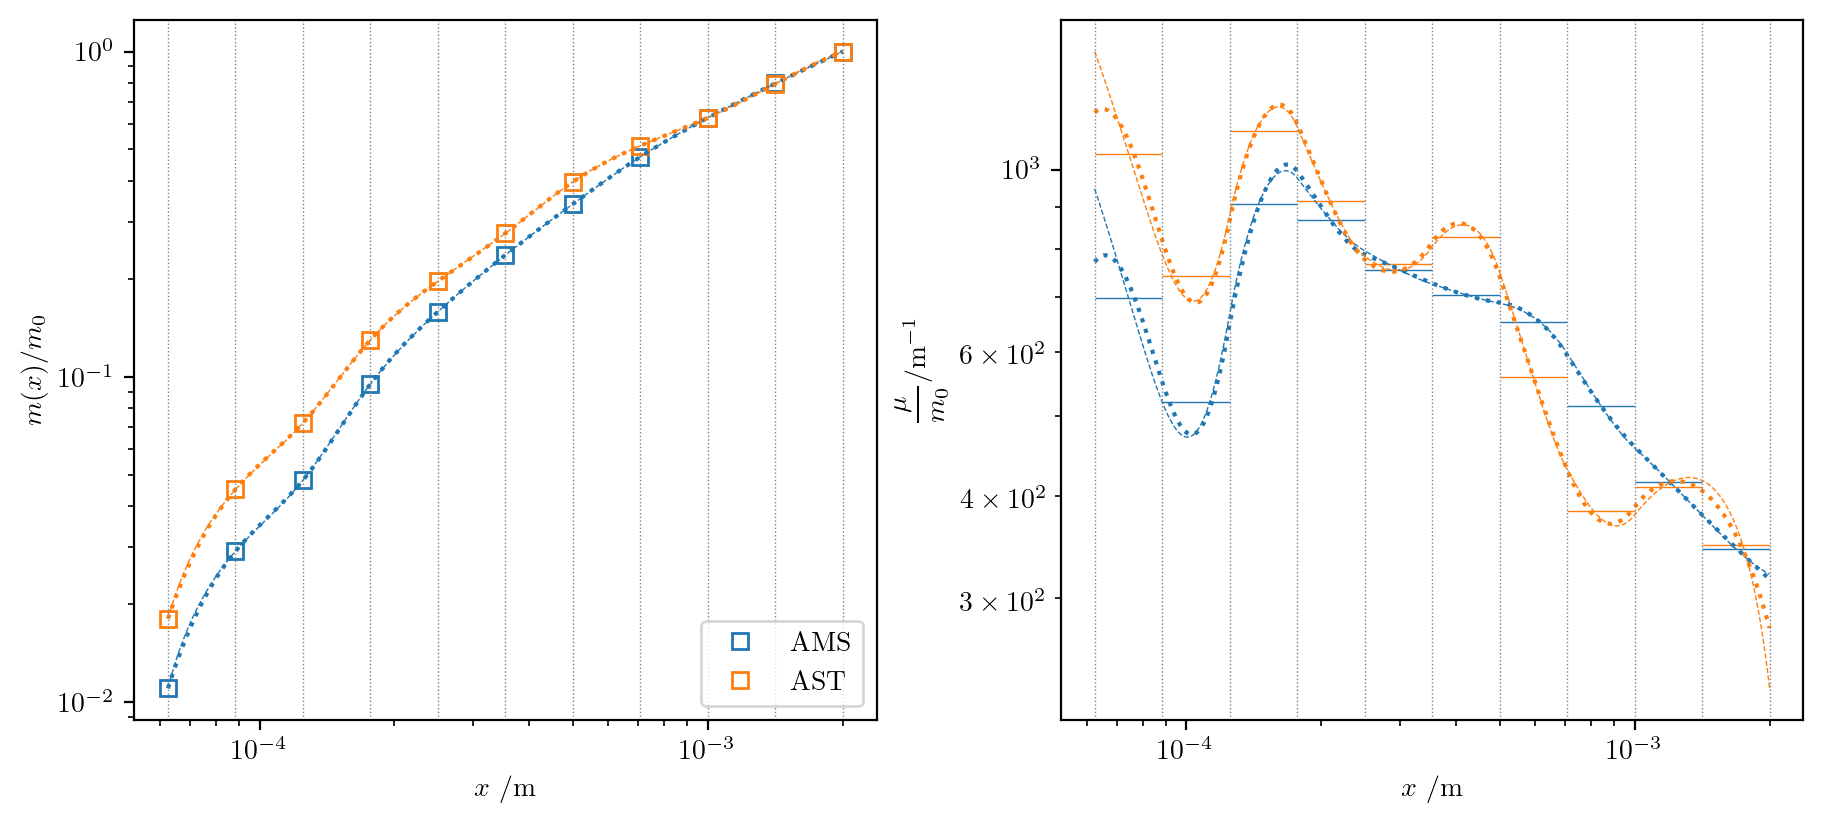

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, constrained_layout=True)

xp = np.logspace(np.log10(xsieve[0]), np.log10(xsieve[-1]), 300)

l1, = ax1.plot(xsieve, ams / 100, marker='s', mfc='none', label='AMS', lw=0)
l2, = ax1.plot(xsieve, ast / 100, marker='s', mfc='none', label='AST', lw=0)
ax1.plot(xp, spl_ams(xp), ls='dashed', color=l1.get_color(), lw=.5)
ax1.plot(xp, spl_ast(xp), ls='dashed', color=l2.get_color(), lw=.5)
ax1.plot(xp, amsfl(xp), ls='dotted', color=l1.get_color())
ax1.plot(xp, astfl(xp), ls='dotted', color=l2.get_color())
ax1.vlines(
    xsieve, 0, 1,
    colors='gray', linestyles='dotted', lw=.5,
    transform=ax1.get_xaxis_transform()
)
ax1.set(
    xscale='log', yscale='log',
    xlabel=r'$x\ /\mathrm{m}$', ylabel=r'$m(x) / m_0$'
)
ax1.legend(loc='lower right')
ax2.hlines(
    mu_ams, xsieve[:-1], xsieve[1:],
    colors=l1.get_color(), lw=.5, zorder=-1
)
ax2.plot(xp, spl_ams.derivative()(xp), ls='dashed', lw=.5)
ax2.plot(xp, amsfl_mu(xp), ls='dotted', color=l1.get_color())
ax2.plot(xp, spl_ast.derivative()(xp), ls='dashed', lw=.5)
ax2.plot(xp, astfl_mu(xp), ls='dotted', color=l2.get_color())
ax2.hlines(
    mu_ast, xsieve[:-1], xsieve[1:],
    colors=l2.get_color(), lw=.5, zorder=-1
)
ax2.vlines(
    xsieve, 0, 1,
    colors='gray', linestyles='dotted', lw=.5,
    transform=ax2.get_xaxis_transform()
)
ax2.set(
    xscale='log', yscale='log',
    xlabel=r'$x\ /\mathrm{m}$',
    ylabel=r'$\dfrac{\mu}{m_0} / \mathrm{m^{-1}}$'
)
fig.set_size_inches(9, 4)